## Random initial guesses

### Polynomial function test

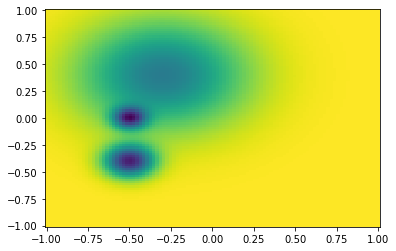

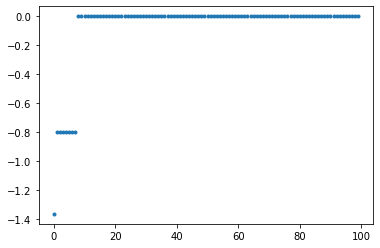

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.optimize import minimize


def double_well(x, a, w, c):
    if x.ndim == 1:
        x = x[:, None, None]
    dw = 0
    for i in range(len(a)):
        xi = x - c[i][:, None, None]
        ri = la.norm(xi, axis=0)
        dw -= a[i] * np.exp(- ri**2 / w[i] ** 2)
    return dw


p = ((1.2, 1, 0.8), (0.15, 0.1, 0.5),
     (np.array([-0.5, -0.4]), np.array([-0.5, 0]), np.array([-0.3, 0.4])))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.pcolormesh(X, Y, double_well(np.array([X, Y]), *p))

N = 100
min = np.array([])
for i in range(N):
    x = np.random.uniform(-5, 5, size=2)
    res = minimize(double_well, x0=x, args=p)
    min = np.append(min, res.fun)
plt.figure()
plt.plot(np.sort(min), '.')


### Comparing lowest and highest final results

### 3 site

In [1]:
from Hubbard.equalizer import *
import numpy as np
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([3], dtype=int),
                          band=1,
                          dim=1,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    print(f'{i}-th attempt ===============================')
    __, __, __, info = G.equalzie('Uvt', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]


0-th attempt ===============================
Initial trap depths: [1.01595696 0.97201231]
Initial waists:
[[0.90053623 1.        ]
 [1.07004633 1.        ]]
Initial trap centers:
[[-0.96125919  0.        ]
 [ 0.          0.        ]]
i=50	c=[9.58595849e-03 6.22268762e-14 3.21599534e-04]	c_i=0.009907558023324697	c_i//2-c_i=0.02984490025090514
i=100	c=[1.02488639e-04 1.68196732e-14 1.21662371e-05]	c_i=0.0001146548763187757	c_i//2-c_i=0.0025657308489653507
i=150	c=[1.06258590e-05 3.27374233e-14 2.60501639e-06]	c_i=1.323087544482017e-05	c_i//2-c_i=0.0003824130836918905
i=200	c=[4.09471286e-07 6.08992640e-14 8.35284641e-08]	c_i=4.929998112826343e-07	c_i//2-c_i=0.00029631605356087516
i=250	c=[2.65322310e-04 6.56900264e-14 2.21946857e-04]	c_i=0.00048726916704118056	c_i//2-c_i=-0.00047335557004165544
i=300	c=[4.09930459e-07 8.17293995e-15 5.58148369e-07]	c_i=9.680788365272316e-07	c_i//2-c_i=1.471230223423178e-06
i=350	c=[2.83017052e-07 1.52659964e-14 1.79823618e-07]	c_i=4.628406858710237e-07	c

Text(0.5, 1.0, 'cost function values in 100 random guesses')

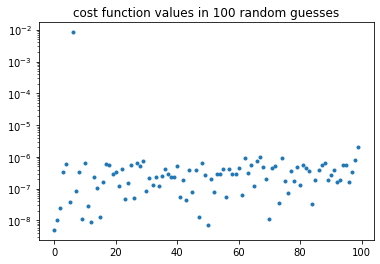

In [2]:
plt.plot(c[:, -1], '.')
plt.yscale('log')
plt.title('cost function values in 100 random guesses')


Text(0.5, 1.0, 'sorted cost function in 100 random guesses')

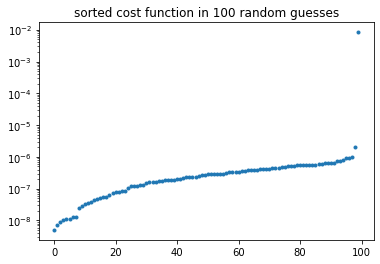

In [3]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')
plt.title('sorted cost function in 100 random guesses')


0.0008289107641960312


Text(0.5, 1.0, 'cost function histograms in 100 random guesses')

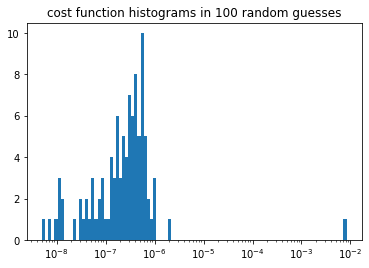

In [4]:
bins = np.geomspace(cs.min(), cs.max(), 100)
plt.hist(cs, bins=bins)
print(np.std(cs))
plt.xscale('log')
plt.title('cost function histograms in 100 random guesses')


In [5]:
cidx = np.argmin(c[:, -1])
print('x0 =', c[cidx, :v0_len])
print('x =', c[cidx, v0_len:-1])
print('f =', c[cidx, -1])


x0 = [ 1.01595696  0.97201231  0.90053623  1.          1.07004633  1.
 -0.96125919  0.          0.          0.        ]
x = [ 0.97009695  0.951875    1.08750761  1.          0.92041243  1.
 -1.03996756  0.          0.          0.        ]
f = 5.046997100900362e-09


Text(0.5, 1.0, '$V_1$ in highest and lowest cost')

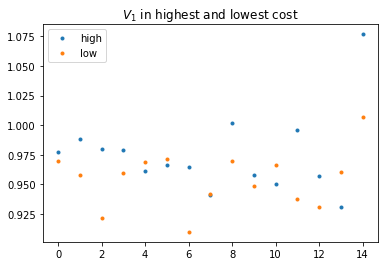

In [12]:
N = 15
chigh = np.argsort(c[:, -1])[-N:]
clow = np.argsort(c[:, -1])[:N]
idx = np.array(list(range(0, 3)) + [4, 6], dtype=int)
chchart = c[chigh][:, list(idx) + list(idx + v0_len) + [-1]]
clchart = c[clow][:, list(idx) + list(idx + v0_len) + [-1]]

plt.plot((chchart[:, 5]), '.', label='high')
plt.plot((clchart[:, 5]), '.', label='low')
plt.legend()
plt.title('$V_1$ in highest and lowest cost')


Text(0.5, 1.0, '$V_2$ in highest and lowest cost')

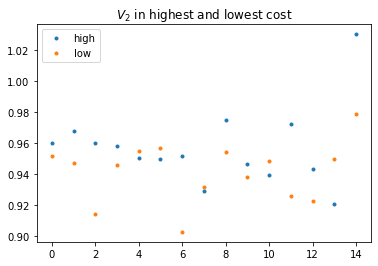

In [13]:
plt.plot((chchart[:, 6]), '.', label='high')
plt.plot((clchart[:, 6]), '.', label='low')
plt.legend()
plt.title('$V_2$ in highest and lowest cost')


Text(0.5, 1.0, '$w_1$ in highest and lowest cost')

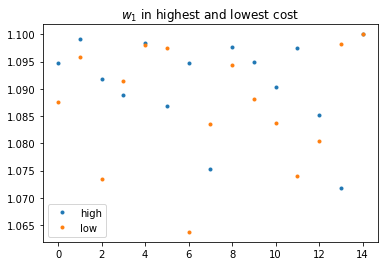

In [14]:
plt.plot((chchart[:, 7]), '.', label='high')
plt.plot((clchart[:, 7]), '.', label='low')
plt.legend()
plt.title('$w_1$ in highest and lowest cost')


Text(0.5, 1.0, '$w_2$ in highest and lowest cost')

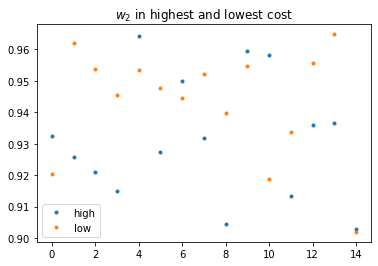

In [15]:
plt.plot((chchart[:, 8]), '.', label='high')
plt.plot((clchart[:, 8]), '.', label='low')
plt.legend()
plt.title('$w_2$ in highest and lowest cost')


Text(0.5, 1.0, '$x_1$ in highest and lowest cost')

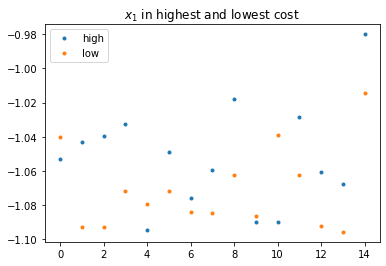

In [16]:
plt.plot((chchart[:, 9]), '.', label='high')
plt.plot((clchart[:, 9]), '.', label='low')
plt.legend()
plt.title('$x_1$ in highest and lowest cost')


Text(0.5, 1.0, 'cost funcs in highest and lowest cost')

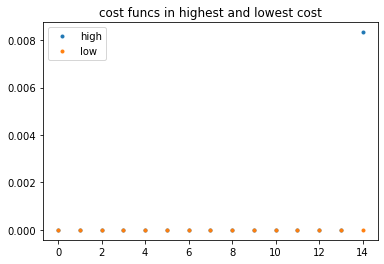

In [17]:
plt.plot((chchart[:, 10]), '.', label='high')
plt.plot((clchart[:, 10]), '.', label='low')
plt.legend()
plt.title('$x_1$ in highest and lowest cost')
plt.title('cost funcs in highest and lowest cost')


It seems that high results are scattered more at waist $w_1 < 1$ and $w_{2h} > w_{2l}$. 

In [18]:
for i in chigh:
    print('x_high =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])

print('\n')
for i in clow:
    print('x_low =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])
    # print('f =', c[i, -1])


x_high = [ 0.97762128  0.96023653  1.09475514  0.93258645 -1.05280092]
x_high = [ 0.98829613  0.9677665   1.09908439  0.92562504 -1.04281581]
x_high = [ 0.98004171  0.96053871  1.09180025  0.92112748 -1.03929182]
x_high = [ 0.97858376  0.95838006  1.08886474  0.91505412 -1.03273234]
x_high = [ 0.96139121  0.95037013  1.09842593  0.96417714 -1.09460561]
x_high = [ 0.96626103  0.94993621  1.08677996  0.92735716 -1.04885207]
x_high = [ 0.96493767  0.95176548  1.09481091  0.94990944 -1.07603484]
x_high = [ 0.94120726  0.92912769  1.07527284  0.93191986 -1.05952996]
x_high = [ 1.00155637  0.97513845  1.09764768  0.90432619 -1.01787449]
x_high = [ 0.95782611  0.94673802  1.09482353  0.95957721 -1.08973655]
x_high = [ 0.95007956  0.9398117   1.09027138  0.95825683 -1.09010345]
x_high = [ 0.99591539  0.97224097  1.09752489  0.91326601 -1.02819218]
x_high = [ 0.95721058  0.94337127  1.08526624  0.93585286 -1.0607207 ]
x_high = [ 0.9310789   0.92084419  1.07179014  0.9366346  -1.06782779]
x_high

In [20]:
import numpy as np
from Hubbard.plot import *
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v, fix_u, fix_t, fix_v = G.str_to_flags('UTv')

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c


offset = np.array([0.97009695,  0.951875,    1.08750761,  1.,       0.92041243,  1.,
                   -1.03996756,  0.,    0,    0.])
cost_func(offset, None)

print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


V = [-43.22971376 -43.22971439 -43.22971376]
t = [0.15273341 0.15273341]
U = [2.05368015 2.05368016 2.05368015]
V_err = 6.796459538366957e-09
t_err = 6.796538564639402e-14
U_err = 2.1184134953531353e-09


### 4 site

In [2]:
from Hubbard.equalizer import *
import numpy as np
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([4], dtype=int),
                          band=1,
                          dim=1,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    print(f'\n{i}-th attempt ===============================')
    __, __, __, info = G.equalzie('uvt', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]



0-th attempt ===============================
Initial trap depths: [1.0179843  0.99825042]
Initial waists:
[[0.92472512 1.        ]
 [1.01955609 1.        ]]
Initial trap centers:
[[-1.59374175  0.        ]
 [-0.5380657   0.        ]]
i=50	c=[0.00111902 0.00327907 0.00396475]	c_i=0.008362844162655782	c_i//2-c_i=0.03680534620108365
i=100	c=[7.24269967e-05 8.02183771e-05 1.21657334e-05]	c_i=0.0001648111070971366	c_i//2-c_i=0.008197902984333934
i=150	c=[1.96098905e-06 6.80023156e-08 3.76613582e-07]	c_i=2.4056049483956216e-06	c_i//2-c_i=0.0008303235716081642
i=200	c=[2.41139845e-06 7.36651863e-07 7.76708488e-07]	c_i=3.924758804784379e-06	c_i//2-c_i=0.00016091633519003812
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.941833390606362e-07
            Iterations: 27
            Function evaluations: 249
            Gradient evaluations: 27

1-th attempt ===============================
Initial trap depths: [1.08365026 0.95629822]
Initial waists:
[[0

Text(0.5, 1.0, 'cost function values in 100 random guesses')

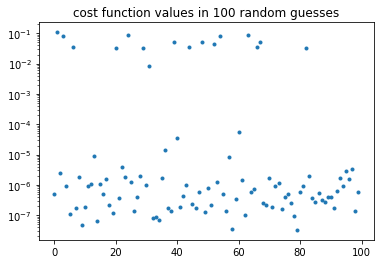

In [3]:
plt.plot(c[:, -1], '.')
plt.yscale('log')
plt.title('cost function values in 100 random guesses')


Text(0.5, 1.0, 'sorted cost function in 100 random guesses')

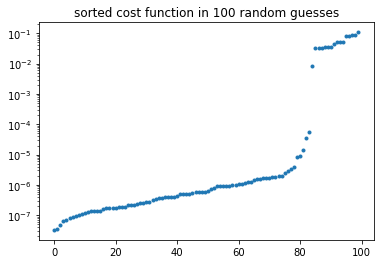

In [4]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')
plt.title('sorted cost function in 100 random guesses')


0.022609960206528713


Text(0.5, 1.0, 'cost function histograms in 100 random guesses')

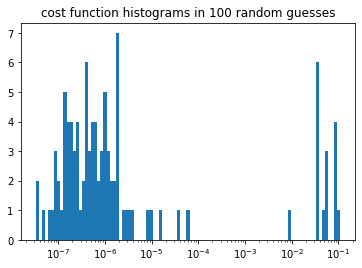

In [5]:
bins = np.geomspace(cs.min(), cs.max(), 100)
plt.hist(cs, bins=bins)
print(np.std(cs))
plt.xscale('log')
plt.title('cost function histograms in 100 random guesses')


Text(0.5, 1.0, '$V_1$ in highest and lowest cost')

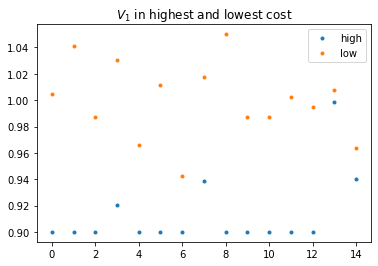

In [6]:
N = 15
ct = c[c[:, -1], :]
chigh = np.argsort(ct[:, -1])[-N:]
clow = np.argsort(ct[:, -1])[:N]
idx = np.array(list(range(0, 3)) + [4, 6, 8], dtype=int)
chchart = ct[chigh][:, list(idx) + list(idx + v0_len) + [-1]]
clchart = ct[clow][:, list(idx) + list(idx + v0_len) + [-1]]

plt.plot((chchart[:, 6]), '.', label='high')
plt.plot((clchart[:, 6]), '.', label='low')
plt.legend()
plt.title('$V_1$ in highest and lowest cost')


Text(0.5, 1.0, '$V_2$ in highest and lowest cost')

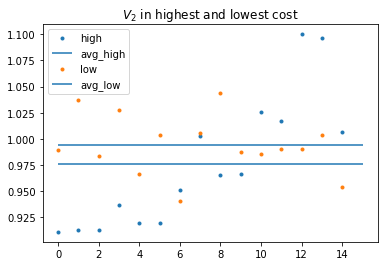

In [7]:
plt.plot((chchart[:, 7]), '.', label='high')
plt.hlines(np.mean(chchart[:, 7]), 0, N, label='avg_high')
plt.plot((clchart[:, 7]), '.', label='low')
plt.hlines(np.mean(clchart[:, 7]), 0, N, label='avg_low')
plt.legend()
plt.title('$V_2$ in highest and lowest cost')


Text(0.5, 1.0, '$w_1$ in highest and lowest cost')

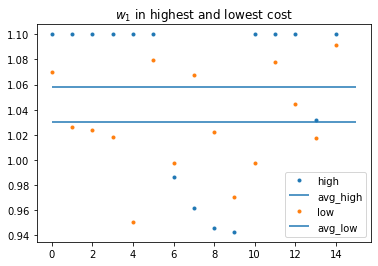

In [8]:
plt.plot((chchart[:, 8]), '.', label='high')
plt.hlines(np.mean(chchart[:, 8]), 0, N, label='avg_high')
plt.plot((clchart[:, 8]), '.', label='low')
plt.hlines(np.mean(clchart[:, 8]), 0, N, label='avg_low')
plt.legend()
plt.title('$w_1$ in highest and lowest cost')


Text(0.5, 1.0, '$w_2$ in highest and lowest cost')

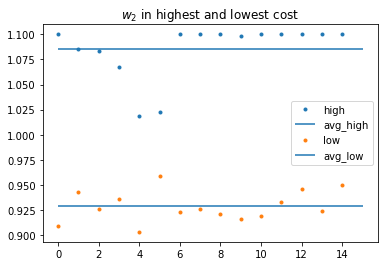

In [9]:
plt.plot((chchart[:, 9]), '.', label='high')
plt.hlines(np.mean(chchart[:, 9]), 0, N, label='avg_high')
plt.plot((clchart[:, 9]), '.', label='low')
plt.hlines(np.mean(clchart[:, 9]), 0, N, label='avg_low')
plt.legend()
plt.title('$w_2$ in highest and lowest cost')


Text(0.5, 1.0, '$x_1$ in highest and lowest cost')

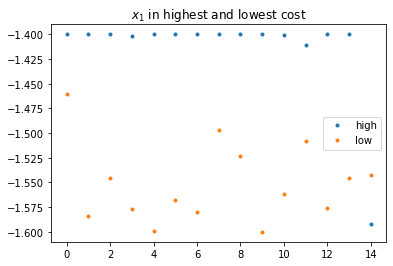

In [10]:
plt.plot((chchart[:, 10]), '.', label='high')
plt.plot((clchart[:, 10]), '.', label='low')
plt.legend()
plt.title('$x_1$ in highest and lowest cost')


Text(0.5, 1.0, '$x_2$ in highest and lowest cost')

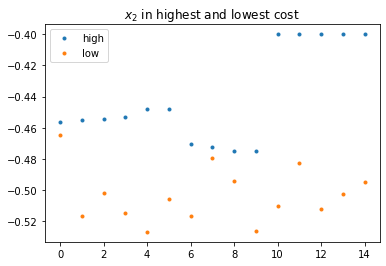

In [11]:
plt.plot((chchart[:, 11]), '.', label='high')
plt.plot((clchart[:, 11]), '.', label='low')
plt.legend()
plt.title('$x_2$ in highest and lowest cost')


Text(0.5, 1.0, 'cost funcs in highest and lowest cost')

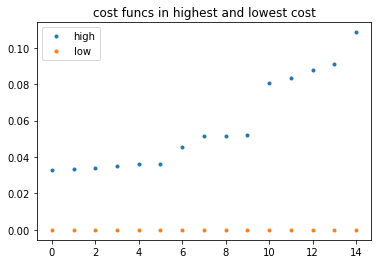

In [12]:
plt.plot((chchart[:, 12]), '.', label='high')
plt.plot((clchart[:, 12]), '.', label='low')
plt.legend()
plt.title('cost funcs in highest and lowest cost')


It seems also low results have much smaller $w_2$ in contrast to high ones.

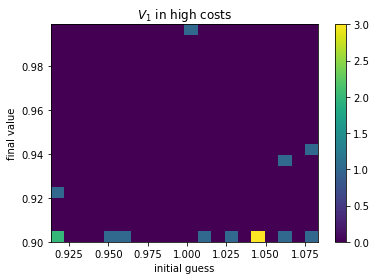

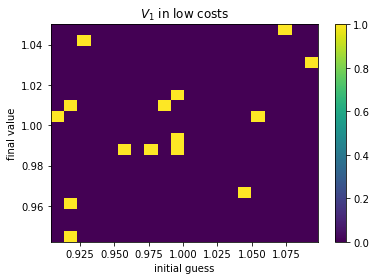

In [13]:
# plt.title('$V_1$ in highest and lowest cost')
plt.figure()
plt.title('$V_1$ in high costs')
plt.hist2d(chchart[:, 0], chchart[:, 6], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$V_1$ in low costs')
plt.hist2d(clchart[:, 0], clchart[:, 6], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()


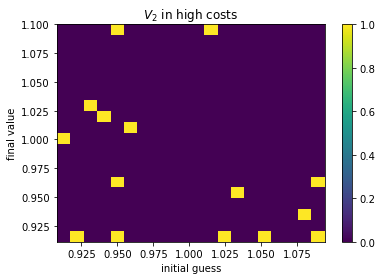

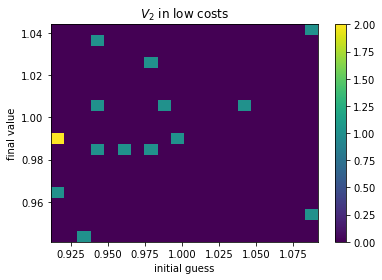

In [14]:
plt.figure()
plt.title('$V_2$ in high costs')
plt.hist2d(chchart[:, 1], chchart[:, 7], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$V_2$ in low costs')
plt.hist2d(clchart[:, 1], clchart[:, 7], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()


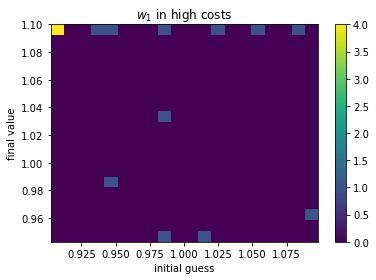

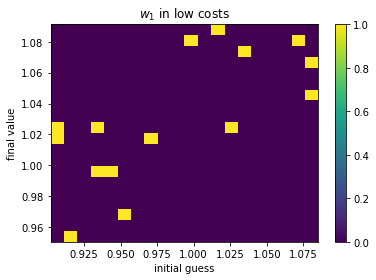

In [15]:
plt.figure()
plt.title('$w_1$ in high costs')
plt.hist2d(chchart[:, 2], chchart[:, 8], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$w_1$ in low costs')
plt.hist2d(clchart[:, 2], clchart[:, 8], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()


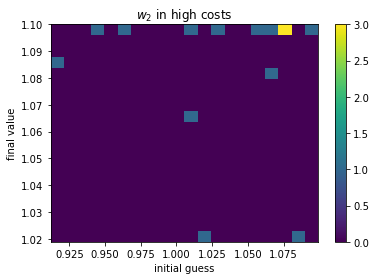

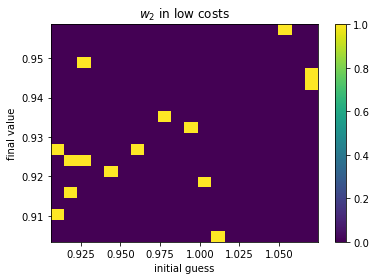

In [16]:
plt.figure()
plt.title('$w_2$ in high costs')
plt.hist2d(chchart[:, 3], chchart[:, 9], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$w_2$ in low costs')
plt.hist2d(clchart[:, 3], clchart[:, 9], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()


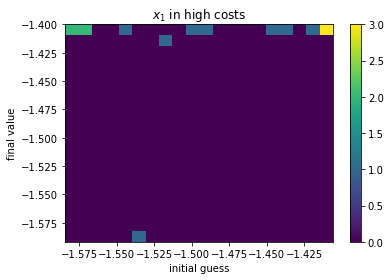

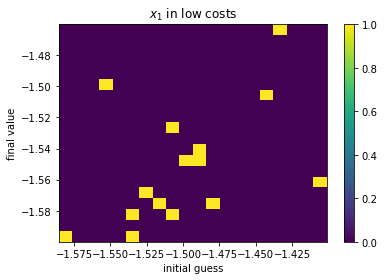

In [17]:
plt.figure()
plt.title('$x_1$ in high costs')
plt.hist2d(chchart[:, 4], chchart[:, 10], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$x_1$ in low costs')
plt.hist2d(clchart[:, 4], clchart[:, 10], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()


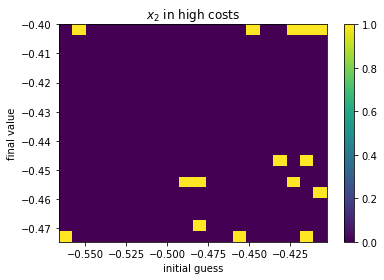

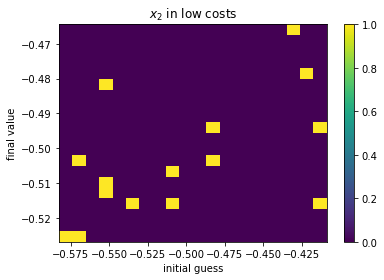

In [18]:
plt.figure()
plt.title('$x_2$ in high costs')
plt.hist2d(chchart[:, 5], chchart[:, 11], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$x_2$ in low costs')
plt.hist2d(clchart[:, 5], clchart[:, 11], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()


The correlation of higher values are more correlated. Maybe the program stops early as the cost function is too flat?

In [19]:
for i in chigh:
    print('x_high =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])

print('\n')
for i in clow:
    print('x_low =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])
    # print('f =', c[i, -1])


x_high = [ 0.9         0.91114057  1.1         1.0999996  -1.4       ]
x_high = [ 0.9         0.91269341  1.1         1.085537   -1.4       ]
x_high = [ 0.90000078  0.9129527   1.09999999  1.08327604 -1.4000024 ]
x_high = [ 0.92041772  0.93661807  1.1         1.0671196  -1.40141221]
x_high = [ 0.9         0.91977392  1.1         1.01892975 -1.4       ]
x_high = [ 0.9         0.91953632  1.1         1.02256909 -1.4       ]
x_high = [ 0.9         0.95141365  0.98639857  1.1        -1.4       ]
x_high = [ 0.93875043  1.0027453   0.96205029  1.1        -1.4       ]
x_high = [ 0.9         0.96533098  0.94627959  1.09999974 -1.4       ]
x_high = [ 0.9         0.96684432  0.9428302   1.0978595  -1.4       ]
x_high = [ 0.90000152  1.0257146   1.09999526  1.1        -1.40109075]
x_high = [ 0.9         1.01676825  1.1         1.1        -1.41070122]
x_high = [ 0.9  1.1  1.1  1.1 -1.4]
x_high = [ 0.9988483   1.09674743  1.03189597  1.0999991  -1.40005336]
x_high = [ 0.94019194  1.00650695  1.1   

### 3x2 grid

In [1]:
from Hubbard.equalizer import *
import numpy as np
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([3, 2], dtype=int),
                          band=1,
                          dim=2,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
v, w, tc, info = G.equalzie('uvt', random=False, callback=False)

i=50	c=[0.01925308 0.00157049 0.01221027]	c_i=0.033033842391954726	c_i//2-c_i=0.013461529946764472
i=100	c=[0.01062463 0.00311313 0.00034384]	c_i=0.014081598666520713	c_i//2-c_i=0.018922097267264723
i=150	c=[2.53599098e-03 8.27105604e-05 6.37105057e-03]	c_i=0.008989752111358626	c_i//2-c_i=0.05575011753886847
i=200	c=[0.00097798 0.00023229 0.00638502]	c_i=0.007595293859957579	c_i//2-c_i=0.006486280630063729
i=250	c=[2.51219335e-05 1.51123037e-04 6.02460364e-03]	c_i=0.006200848614234155	c_i//2-c_i=0.00333667184017716
i=300	c=[8.09055337e-05 5.00743827e-05 4.87825566e-03]	c_i=0.005009235576813478	c_i//2-c_i=0.003980727706384949
i=350	c=[6.93395576e-04 1.42574721e-04 6.22605337e-06]	c_i=0.0008421963504060116	c_i//2-c_i=0.006753043430558744
i=400	c=[6.82974835e-04 3.71320380e-06 4.34235494e-07]	c_i=0.0006871222744988749	c_i//2-c_i=0.0069082026399295065
i=450	c=[6.80494781e-04 1.84961145e-06 5.69115483e-08]	c_i=0.0006824013043873468	c_i//2-c_i=0.006598796763345694
i=500	c=[6.75376927e-04 3.0